In [1]:
#import liaberies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Capital One - Data Set (STEP UP).xlsx',index_col='CUSTOMER_ID')
df.shape

(10000, 14)

In [3]:
#sns.pairplot(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REGION            9965 non-null   object 
 1   AGE               9960 non-null   float64
 2   PARENT            10000 non-null  int64  
 3   OCCUPATION        9958 non-null   object 
 4   MOBILE_APP_USER   9958 non-null   float64
 5   CARD_COLOUR       9960 non-null   object 
 6   CREDIT_LIMIT      10000 non-null  int64  
 7   SPEND_M1_TRAVEL   10000 non-null  float64
 8   SPEND_M1_GROCERY  10000 non-null  float64
 9   SPEND_M1_OTHER    10000 non-null  float64
 10  SPEND_M2_TRAVEL   10000 non-null  float64
 11  SPEND_M2_GROCERY  10000 non-null  float64
 12  SPEND_M2_OTHER    10000 non-null  float64
 13  SPEND_M3_TOTAL    10000 non-null  float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.1+ MB


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9805 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REGION            9805 non-null   object 
 1   AGE               9805 non-null   float64
 2   PARENT            9805 non-null   int64  
 3   OCCUPATION        9805 non-null   object 
 4   MOBILE_APP_USER   9805 non-null   float64
 5   CARD_COLOUR       9805 non-null   object 
 6   CREDIT_LIMIT      9805 non-null   int64  
 7   SPEND_M1_TRAVEL   9805 non-null   float64
 8   SPEND_M1_GROCERY  9805 non-null   float64
 9   SPEND_M1_OTHER    9805 non-null   float64
 10  SPEND_M2_TRAVEL   9805 non-null   float64
 11  SPEND_M2_GROCERY  9805 non-null   float64
 12  SPEND_M2_OTHER    9805 non-null   float64
 13  SPEND_M3_TOTAL    9805 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.1+ MB


In [6]:
print('Unique Age \n',df['AGE'].value_counts().sort_index(), '\n')

print('Unique Region\n',df['REGION'].value_counts(), '\n')

print('Unique OCCUPATION\n',df['OCCUPATION'].value_counts(), '\n')

print('Unique CARD_COLOUR\n',df['CARD_COLOUR'].value_counts(), '\n')

Unique Age 
 18.0    203
19.0     56
20.0     71
21.0     87
22.0     83
       ... 
95.0      3
96.0      2
97.0      3
98.0      2
99.0      6
Name: AGE, Length: 82, dtype: int64 

Unique Region
 England             8328
Scotland             763
Wales                434
Northern Ireland     280
Name: REGION, dtype: int64 

Unique OCCUPATION
 Employed         3804
Student          2258
Retired          1339
Unemployed       1326
Self-employed    1078
Name: OCCUPATION, dtype: int64 

Unique CARD_COLOUR
 Red      4697
Black    3548
Blue     1560
Name: CARD_COLOUR, dtype: int64 



In [7]:
df['TotalSpend (M1+M2+M3)'] = df[['SPEND_M1_TRAVEL','SPEND_M1_GROCERY','SPEND_M1_OTHER','SPEND_M2_TRAVEL','SPEND_M2_GROCERY','SPEND_M2_OTHER','SPEND_M3_TOTAL']].sum(axis=1)
df

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,SPEND_M1_TRAVEL,SPEND_M1_GROCERY,SPEND_M1_OTHER,SPEND_M2_TRAVEL,SPEND_M2_GROCERY,SPEND_M2_OTHER,SPEND_M3_TOTAL,TotalSpend (M1+M2+M3)
CUSTOMER_ID,,,,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,5.71,16.60,4.95,8.64,13.04,7.49,30.51,86.94
1,Northern Ireland,42.0,0,Employed,1.0,Red,500,38.27,43.51,79.22,90.10,0.00,78.40,20.41,349.91
2,England,28.0,1,Employed,1.0,Black,250,32.90,59.49,8.04,36.07,56.74,18.74,109.33,321.31
3,England,31.0,0,Unemployed,1.0,Black,500,32.60,47.55,23.87,14.45,21.08,10.58,50.34,200.47
4,England,47.0,1,Student,1.0,Black,1000,262.42,0.00,26.70,229.87,0.00,183.74,184.99,887.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,England,61.0,1,Retired,0.0,Blue,1000,81.31,64.15,26.90,96.28,75.97,31.85,39.06,415.52
9996,England,81.0,0,Employed,1.0,Red,250,56.32,21.46,74.32,31.61,28.13,2.26,144.98,359.08
9997,England,18.0,0,Self-employed,1.0,Red,250,11.01,17.66,6.01,7.98,12.79,4.35,69.22,129.02


In [8]:
df.columns

Index(['REGION', 'AGE', 'PARENT', 'OCCUPATION', 'MOBILE_APP_USER',
       'CARD_COLOUR', 'CREDIT_LIMIT', 'SPEND_M1_TRAVEL', 'SPEND_M1_GROCERY',
       'SPEND_M1_OTHER', 'SPEND_M2_TRAVEL', 'SPEND_M2_GROCERY',
       'SPEND_M2_OTHER', 'SPEND_M3_TOTAL', 'TotalSpend (M1+M2+M3)'],
      dtype='object')

In [16]:
df['Travel (M1+M2)'] = df[['SPEND_M1_TRAVEL','SPEND_M2_TRAVEL']].sum(axis=1)
df['Grocery (M1+M2)'] = df[['SPEND_M1_GROCERY','SPEND_M2_GROCERY']].sum(axis=1)
df['Grocery (M1+M2)'] = df[['SPEND_M1_GROCERY','SPEND_M2_GROCERY']].sum(axis=1)
df['Other'] = df[['SPEND_M1_OTHER','SPEND_M2_OTHER']].sum(axis=1)
df

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,SPEND_M1_TRAVEL,SPEND_M1_GROCERY,SPEND_M1_OTHER,SPEND_M2_TRAVEL,SPEND_M2_GROCERY,SPEND_M2_OTHER,SPEND_M3_TOTAL,TotalSpend (M1+M2+M3),Travel (M1+M2),Grocery (M1+M2),Other,AgeGroup,Other
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,5.71,16.60,4.95,8.64,13.04,7.49,30.51,86.94,14.35,29.64,12.44,Working Class,12.44
1,Northern Ireland,42.0,0,Employed,1.0,Red,500,38.27,43.51,79.22,90.10,0.00,78.40,20.41,349.91,128.37,43.51,157.62,Working Class,157.62
2,England,28.0,1,Employed,1.0,Black,250,32.90,59.49,8.04,36.07,56.74,18.74,109.33,321.31,68.97,116.23,26.78,Working Class,26.78
3,England,31.0,0,Unemployed,1.0,Black,500,32.60,47.55,23.87,14.45,21.08,10.58,50.34,200.47,47.05,68.63,34.45,Working Class,34.45
4,England,47.0,1,Student,1.0,Black,1000,262.42,0.00,26.70,229.87,0.00,183.74,184.99,887.72,492.29,0.00,210.44,Working Class,210.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,England,61.0,1,Retired,0.0,Blue,1000,81.31,64.15,26.90,96.28,75.97,31.85,39.06,415.52,177.59,140.12,58.75,Retired/Old Age Group,58.75
9996,England,81.0,0,Employed,1.0,Red,250,56.32,21.46,74.32,31.61,28.13,2.26,144.98,359.08,87.93,49.59,76.58,Retired/Old Age Group,76.58
9997,England,18.0,0,Self-employed,1.0,Red,250,11.01,17.66,6.01,7.98,12.79,4.35,69.22,129.02,18.99,30.45,10.36,Teenagers/Youngsters,10.36


In [17]:
age = [(18,25),(26,50),(51,99)]
label =['Teenagers/Youngsters' , 'Working Class' , 'Retired/Old Age Group']

df['AgeGroup'] = np.select([df['AGE'].between(range[0], range[1])for range in age],label,default = 'Unknown')
df

,REGION,AGE,PARENT,OCCUPATION,MOBILE_APP_USER,CARD_COLOUR,CREDIT_LIMIT,SPEND_M1_TRAVEL,SPEND_M1_GROCERY,SPEND_M1_OTHER,SPEND_M2_TRAVEL,SPEND_M2_GROCERY,SPEND_M2_OTHER,SPEND_M3_TOTAL,TotalSpend (M1+M2+M3),Travel (M1+M2),Grocery (M1+M2),Other,AgeGroup,Other
CUSTOMER_ID,,,,,,,,,,,,,,,,,,,,
0,England,48.0,0,Employed,1.0,Blue,250,5.71,16.60,4.95,8.64,13.04,7.49,30.51,86.94,14.35,29.64,12.44,Working Class,12.44
1,Northern Ireland,42.0,0,Employed,1.0,Red,500,38.27,43.51,79.22,90.10,0.00,78.40,20.41,349.91,128.37,43.51,157.62,Working Class,157.62
2,England,28.0,1,Employed,1.0,Black,250,32.90,59.49,8.04,36.07,56.74,18.74,109.33,321.31,68.97,116.23,26.78,Working Class,26.78
3,England,31.0,0,Unemployed,1.0,Black,500,32.60,47.55,23.87,14.45,21.08,10.58,50.34,200.47,47.05,68.63,34.45,Working Class,34.45
4,England,47.0,1,Student,1.0,Black,1000,262.42,0.00,26.70,229.87,0.00,183.74,184.99,887.72,492.29,0.00,210.44,Working Class,210.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,England,61.0,1,Retired,0.0,Blue,1000,81.31,64.15,26.90,96.28,75.97,31.85,39.06,415.52,177.59,140.12,58.75,Retired/Old Age Group,58.75
9996,England,81.0,0,Employed,1.0,Red,250,56.32,21.46,74.32,31.61,28.13,2.26,144.98,359.08,87.93,49.59,76.58,Retired/Old Age Group,76.58
9997,England,18.0,0,Self-employed,1.0,Red,250,11.01,17.66,6.01,7.98,12.79,4.35,69.22,129.02,18.99,30.45,10.36,Teenagers/Youngsters,10.36


In [11]:
df.dtypes

REGION                    object
AGE                      float64
PARENT                     int64
OCCUPATION                object
MOBILE_APP_USER          float64
CARD_COLOUR               object
CREDIT_LIMIT               int64
SPEND_M1_TRAVEL          float64
SPEND_M1_GROCERY         float64
SPEND_M1_OTHER           float64
SPEND_M2_TRAVEL          float64
SPEND_M2_GROCERY         float64
SPEND_M2_OTHER           float64
SPEND_M3_TOTAL           float64
TotalSpend (M1+M2+M3)    float64
Travel (M1+M2)           float64
Grocery (M1+M2)          float64
Other                    float64
AgeGroup                  object
dtype: object

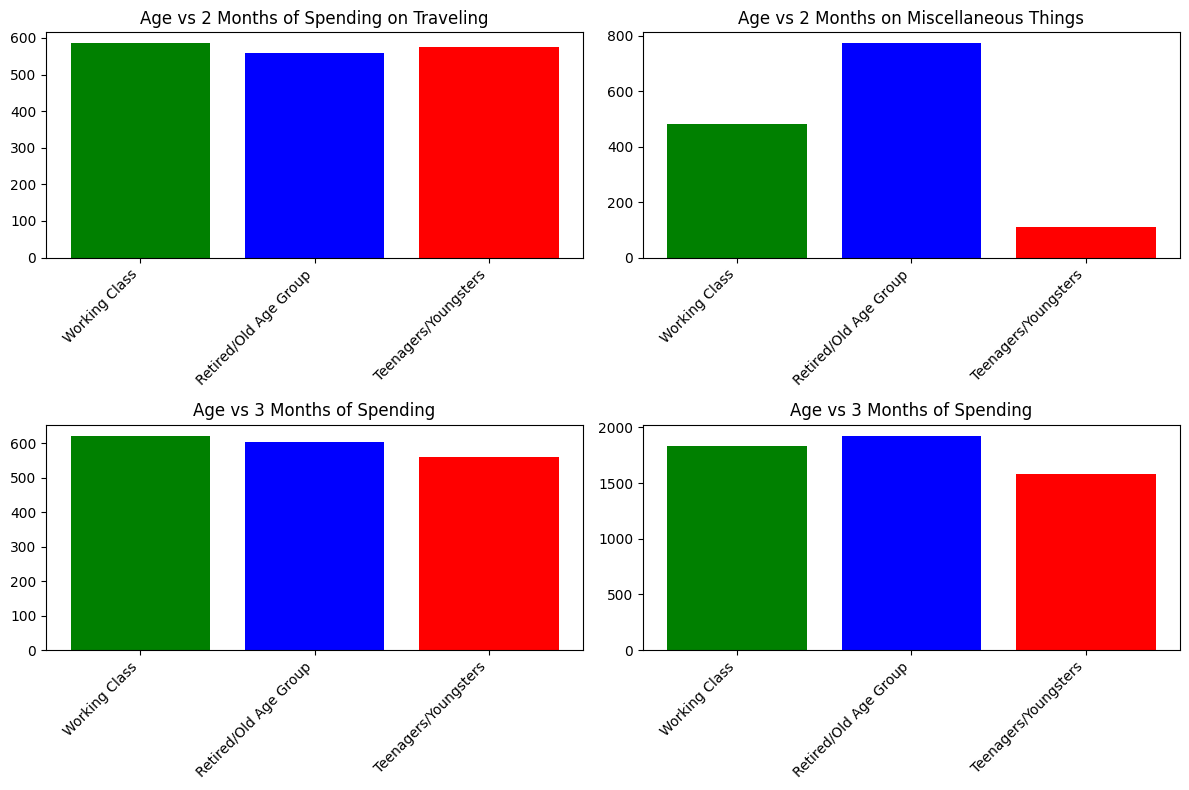

In [22]:
plt.figure(figsize=(12, 8))

age_colors = {
    'Teenagers/Youngsters': 'red',
    'Working Class': 'green',
    'Retired/Old Age Group': 'blue'
}

plt.subplot(221)
plt.bar(df['AgeGroup'], df['Travel (M1+M2)'], color=[age_colors[i] for i in df['AgeGroup']])
plt.title('Age vs 2 Months of Spending on Traveling')
plt.xticks(rotation=45, ha='right')

plt.subplot(222)
plt.bar(df['AgeGroup'], df['Other'], color=[age_colors[i] for i in df['AgeGroup']])
plt.title('Age vs 2 Months on Miscellaneous Things')
plt.xticks(rotation=45, ha='right')

plt.subplot(223)
plt.bar(df['AgeGroup'], df['Grocery (M1+M2)'], color=[age_colors[i] for i in df['AgeGroup']])
plt.title('Age vs 3 Months of Spending')
plt.xticks(rotation=45, ha='right')

plt.subplot(224)
plt.bar(df['AgeGroup'], df['TotalSpend (M1+M2+M3)'], color=[age_colors[i] for i in df['AgeGroup']])
plt.title('Age vs 3 Months of Spending')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show();


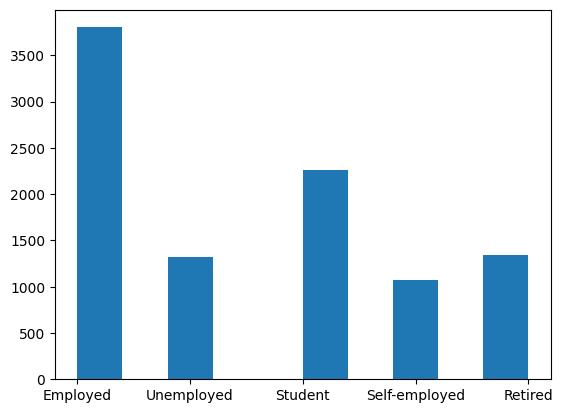

In [23]:
plt.hist(df['OCCUPATION'])
plt.show()

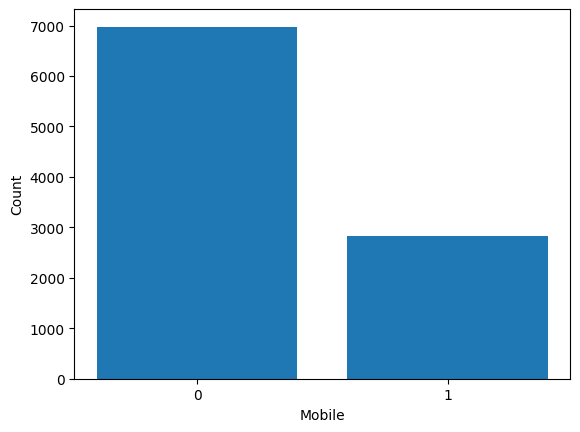

In [40]:
values = df['MOBILE_APP_USER'].value_counts().values
labels = ['0', '1']

plt.bar(labels, values)
plt.xlabel('Mobile')
plt.ylabel('Count')

plt.show();

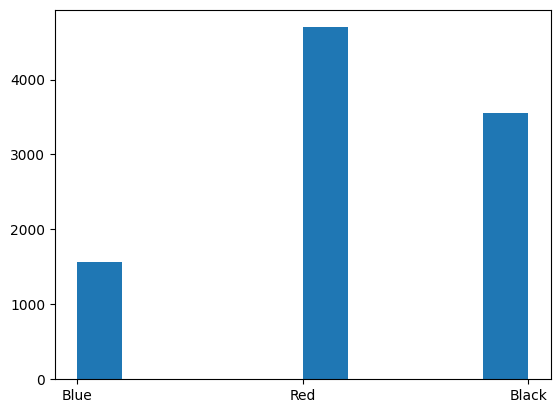

In [42]:
plt.hist(df['CARD_COLOUR'])
plt.show()